# 08_CNN 실습

In [3]:
import tensorflow as tf

mnist= tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000,28,28,1))

![](./lecture_image/08-01.png)

In [5]:
# 모델 구성
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-06-08 13:08:08.370478: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-08 13:08:08.372436: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [6]:
# 훈련 시작
import time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data = (X_test, y_test))

2022-06-08 13:09:49.660662: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-06-08 13:09:50.027225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.1150 - accuracy: 0.9643

2022-06-08 13:10:26.404905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 39s 20ms/step - loss: 0.1149 - accuracy: 0.9643 - val_loss: 0.0542 - val_accuracy: 0.9827
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0448 - accuracy: 0.9850 - val_loss: 0.0302 - val_accuracy: 0.9901
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0361 - val_accuracy: 0.9886
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0317 - val_accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.0327 - val_accuracy: 0.9911


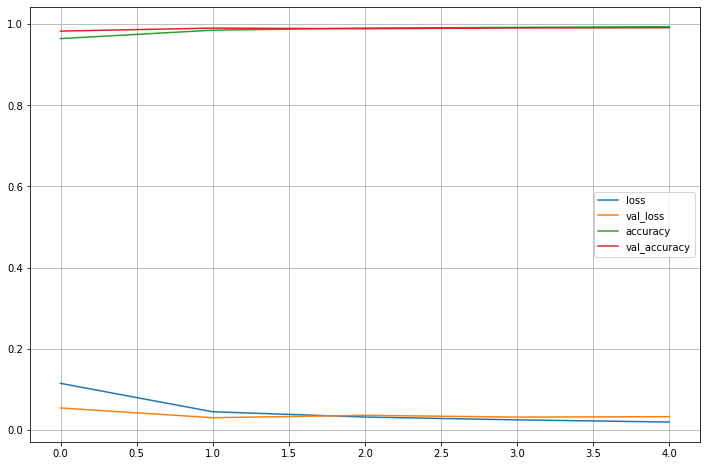

In [9]:
# 훈련상황은 ?
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss','val_loss','accuracy','val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [10]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

2022-06-08 13:18:55.722754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [11]:
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

89

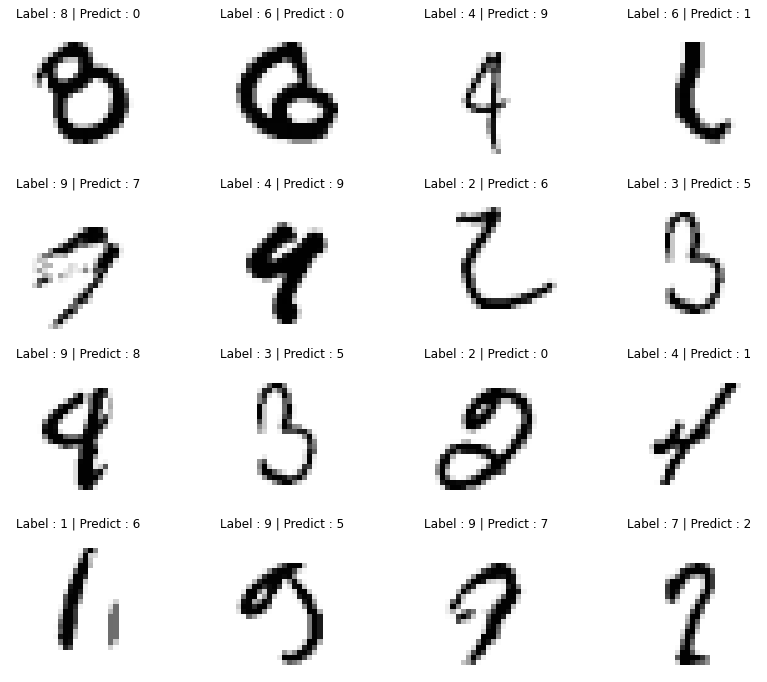

In [12]:
import random

samples = random.choices(population=wrong_result, k=16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys')
    plt.title('Label : ' + str(y_test[n]) + ' | Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [13]:
score = model.evaluate(X_test, y_test)
print('Test loss :',score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0327 - accuracy: 0.9911
Test loss : 0.03274774178862572
Test accuracy : 0.9911000728607178


In [14]:
# 모델 저장하기
# model.save('MNIST_CNN_model.h5')

# Fashion MNIST 에 적용하기


In [15]:
from tensorflow.keras import datasets

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [16]:
# 모델 구성
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [17]:
# 훈련 시작
import time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
%%time
hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data = (X_test, y_test))

Epoch 1/5


2022-06-08 13:27:16.852921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.3895 - accuracy: 0.8577

2022-06-08 13:27:49.170557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 34s 18ms/step - loss: 0.3893 - accuracy: 0.8578 - val_loss: 0.3058 - val_accuracy: 0.8861
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2651 - accuracy: 0.9011 - val_loss: 0.2671 - val_accuracy: 0.9002
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2261 - accuracy: 0.9145 - val_loss: 0.2410 - val_accuracy: 0.9138
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1967 - accuracy: 0.9262 - val_loss: 0.2615 - val_accuracy: 0.9071
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1697 - accuracy: 0.9354 - val_loss: 0.2403 - val_accuracy: 0.9153
CPU times: user 2min 9s, sys: 1min 17s, total: 3min 27s
Wall time: 2min 38s


In [19]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.2403 - accuracy: 0.9153
Test loss : 0.2402588278055191
Test accuracy : 0.9153000712394714
